# DO NOT TOUCH ANYTHING

- adjust the file size
- change the links to save
- change the intensity of files

OTHER STUF IS NOT TO BE CHANGED

#imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

In [4]:
pip install git+https://github.com/pulse2percept/pulse2percept

  Cloning https://github.com/pulse2percept/pulse2percept to /tmp/pip-req-build-m2wydlrv
  Running command git clone --filter=blob:none --quiet https://github.com/pulse2percept/pulse2percept /tmp/pip-req-build-m2wydlrv
  Resolved https://github.com/pulse2percept/pulse2percept to commit c5ec18a6ae756bd50638b1aa99040ba17fc859b3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
import matplotlib.pyplot as plt
from pulse2percept.stimuli import GratingStimulus
from pulse2percept.stimuli.psychophysics import BarStimulus
import numpy as np
from pulse2percept.stimuli import VideoStimulus
from PIL import Image
import os


#old

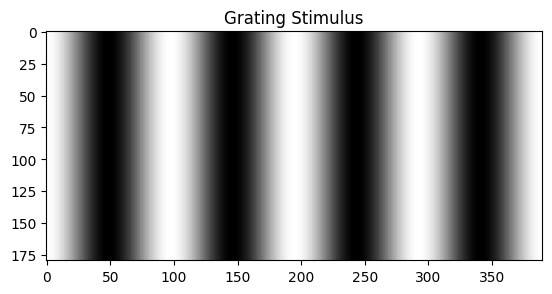

In [4]:
stim = GratingStimulus((180, 390), spatial_freq=4/390, temporal_freq=0.04, contrast=1, mask=None)
plt.imshow(stim.data[:, 0].reshape(180, 390), cmap='gray')
plt.title("Grating Stimulus")
plt.show()

In [5]:
# Load the image
image_path = r'/content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/1/binary_grating_stimulus_0.png'
image = Image.open(image_path)
# Convert image to numpy array
image_array = np.array(image)
# Calculate the average color
average_color = image_array.mean(axis=(0, 1))

# Define the average RGB values
average_rgb = [142, 143, 143]
# Convert the RGB values to a hexadecimal color code
hex_color = "#{:02x}{:02x}{:02x}".format(average_rgb[0], average_rgb[1], average_rgb[2])
print(hex_color)
# Define the average RGB values
average_rgb = [142, 143, 143]
# Convert the RGB values to a hexadecimal color code
hex_color = "#{:02x}{:02x}{:02x}".format(average_rgb[0], average_rgb[1], average_rgb[2])
hex_color

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/1/binary_grating_stimulus_0.png'

In [ ]:
stim.play()

In [ ]:
stim = BarStimulus((50, 50), speed=1)
stim.play()

In [ ]:
def create_binary_grating_stimulus(shape, spatial_freq, temporal_freq, num_frames, direction=0):
    # Create the grating stimulus
    stim = GratingStimulus(shape, spatial_freq=spatial_freq, temporal_freq=temporal_freq, direction=direction)

    # Convert to binary (0 or 1) vertical grating
    # binary_frames = (stim.data > 0.5).astype(np.uint8)
    binary_frames=stim

    return binary_frames

# Define parameters
shape =  (18, 39)  # size of each frame (1080x1961 pixels)
spatial_freq = 4/shape[1]   # spatial frequency of the grating
temporal_freq = 0.04  # temporal frequency of the grating
num_frames = 10  # number of frames in the GIF

# Create the binary grating stimulus
binary_frames_N = create_binary_grating_stimulus(shape, spatial_freq, temporal_freq, num_frames, direction=180+45)
binary_frames_N.play()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(binary_frames_N[:, 420].reshape(shape), cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove padding
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.show()

#functions

In [6]:
def create_binary_grating_stimulus(shape, spatial_freq, temporal_freq, num_frames, direction=0):
    # Create the grating stimulus
    stim = GratingStimulus(shape, spatial_freq=spatial_freq, temporal_freq=temporal_freq, direction=direction)

    # Convert to binary (0 or 1) vertical grating
    # binary_frames = (stim.data > 0.5).astype(np.uint8)
    binary_frames=stim

    return binary_frames

In [7]:
def create_binary_grating_stimulus(shape, spatial_freq, temporal_freq, num_frames, direction=0):
    # Create the grating stimulus
    stim = GratingStimulus(shape, spatial_freq=spatial_freq, temporal_freq=temporal_freq, direction=direction)

    # Convert to binary (0 or 1) vertical grating
    # binary_frames = (stim.data > 0.5).astype(np.uint8)
    binary_frames=stim

    return binary_frames

In [8]:
def save_stimulus_as_image_and_gif(frames, shape, file_name_prefix):
    # Save as PNG (first frame)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(frames[:, 0].reshape(shape), cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove padding
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    plt.savefig(f"{file_name_prefix}.png", bbox_inches='tight', pad_inches=0)
    plt.close(fig)

    # Save as GIF
    images = []
    for i in range(frames.shape[1]):
        frame = frames[:, i].reshape(shape)
        img = Image.fromarray((frame * 255).astype(np.uint8), 'L')  # 'L' mode for grayscale
        images.append(img)
    images[0].save(f"{file_name_prefix}.gif", save_all=True, append_images=images[1:], loop=0, duration=10)
#file_link = r'/content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/1/'
# Save the binary grating stimulus
#save_stimulus_as_image_and_gif(binary_stimulus_frames, shape, os.path.join(file_link, "binary_grating_stimulus"))

In [9]:
def rotate_grating(frames, angle):
    rotated_frames = []
    for i in range(frames.shape[1]):
        frame = frames[:, i].reshape(shape)
        img = Image.fromarray((frame * 255).astype(np.uint8), 'L')  # Convert to PIL image
        rotated_img = img.rotate(angle, resample=Image.NEAREST, expand=True)
        rotated_frames.append(np.array(rotated_img) / 255.0)
    return np.array(rotated_frames)


In [10]:
# Define utility to create a binary grating stimulus
def create_grating_frame(shape, spatial_freq, phase, direction=0):
    """Creates a single frame of a binary grating stimulus at a specific phase."""
    # Create a grid of x, y coordinates
    x = np.linspace(0, 2 * np.pi, shape[1])
    y = np.linspace(0, 2 * np.pi, shape[0])
    X, Y = np.meshgrid(x, y)

    # Compute the grating
    grating = np.sin(spatial_freq * X + phase)

    # Convert to binary (0 or 1)
    binary_frame = (grating > 0).astype(np.uint8)

    return binary_frame

def create_grating_sequence(shape, spatial_freq, temporal_freq, num_frames, direction=0):
    """Generates a sequence of grating frames with a temporal frequency."""
    # Calculate phase shift per frame
    phase_shift = 2 * np.pi * temporal_freq / num_frames
    frames = []

    # Create each frame in the sequence
    for frame_idx in range(num_frames):
        phase = frame_idx * phase_shift
        frame = create_grating_frame(shape, spatial_freq, phase, direction)
        frames.append(frame)

    return frames



In [11]:
def create_binary_grating_stimulus_array(binary_stimulus, shape):
    """
    Create binary grating stimulus frames and store every 10th frame in a list.

    Parameters:
    binary_stimulus (numpy array): The stimulus data with shape (num_pixels, num_frames)
    shape (tuple): The shape to reshape each frame into (e.g., (18, 39))

    Returns:
    list: A list containing every 10th frame (and the last frame).
    """
    binary_grating_frames = []

    # Loop to generate and store the frames
    for b in range(509):   # Close the plot to avoid memory issues
          # Reshape to (18, 39) for the frame

    # Only store every 10th frame or the last one
        if b % 10 == 0:# or b == 509:
            frame = binary_stimulus[:, b].reshape(shape)
            frame = np.where(frame > 0.5, 1, 0)  # Convert to binary (0 or 1)
            binary_grating_frames.append(frame)

            # Optionally save the frame as a PNG (as in your original code)
            fig, ax = plt.subplots()
            ax.imshow(frame, cmap='gray', vmin=0, vmax=1)
            plt.axis('off')
            plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove padding
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_frame_on(False)
            #plt.savefig(f'/content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/grating_colage/1/frame_{b}.png',
                        #bbox_inches='tight', pad_inches=0, transparent=True)
            plt.close()
    #binary_grating_frames = binary_grating_frames + binary_grating_frames + binary_grating_frames + binary_grating_frames  + binary_grating_frames  + binary_grating_frames  + binary_grating_frames  + binary_grating_frames  + binary_grating_frames  + binary_grating_frames
    #binary_grating_frames = binary_grating_frames[0:300] # Keep only the first 120 frames
    # Return the list of stored frames
    return binary_grating_frames  # Return the list of stored frames

In [12]:

# Function to generate a grating for still and moving stimuli
def create_still_and_moving_grating(shape, spatial_freq, still_temporal_freq, moving_temporal_freq, num_frames, directions):
    grating_frames = []
    for direction in directions:
        # Still grating
        still_grating = create_binary_grating_stimulus_array(
            create_binary_grating_stimulus(shape, spatial_freq, still_temporal_freq, num_frames, direction=direction), shape
        )
        # Moving grating
        moving_grating_1 = create_binary_grating_stimulus_array(
            create_binary_grating_stimulus(shape, spatial_freq, moving_temporal_freq, num_frames, direction=direction), shape
        )
        moving_grating_2 = create_binary_grating_stimulus_array(
            create_binary_grating_stimulus(shape, spatial_freq, moving_temporal_freq, num_frames, direction=direction+180), shape
        )
        grating_frames.append((still_grating, moving_grating_1, moving_grating_2))
    return grating_frames

#workflow

In [13]:
shape = (108, 192)  # 18x39 pixels frame size
spatial_freq = 4 / shape[1]  # Spatial frequency of the grating for each row
num_frames = 51  # Number of frames in 1 second
contrast = 1
directions = [0, 45, 90, 135]

grey_rgb_value = [80, 80, 80]
grey_row = [np.full(shape, np.mean(grey_rgb_value), dtype=np.uint8) for _ in range(num_frames)]
black_row = [np.zeros(shape, dtype=np.uint8) for _ in range(num_frames)]
grating_frames = create_still_and_moving_grating(
    shape, spatial_freq, still_temporal_freq=0, moving_temporal_freq=0.04, num_frames=num_frames, directions=directions
)

In [28]:
grey_rgb_value = [40, 40, 40]

In [29]:

collage = []
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
for still_grating, moving_grating_1, moving_grating_2 in grating_frames:
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(still_grating)
      collage.extend(still_grating)
      collage.extend(still_grating)
      collage.extend(still_grating)
      collage.extend(still_grating)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(moving_grating_1)
      collage.extend(moving_grating_1)
      collage.extend(moving_grating_1)
      collage.extend(moving_grating_1)
      collage.extend(moving_grating_1)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(grey_row)
      collage.extend(moving_grating_2)
      collage.extend(moving_grating_2)
      collage.extend(moving_grating_2)
      collage.extend(moving_grating_2)
      collage.extend(moving_grating_2)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage.extend(black_row)
collage_array = np.array(collage)

collage_image = np.vstack([np.hstack(collage_array[i * num_frames:(i + 1) * num_frames])
                           for i in range(len(collage) // num_frames)])

# Save the final collage as an image
output_image = Image.fromarray((collage_image * 51).astype(np.uint8))
output_image.save('/content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/grating_colage/for_yuri_NEW/polina_mod_2_77.png')

print("Collage saved successfully.")

Collage saved successfully.


In [26]:
# Assume you have generated the `collage_array` from the previous code
# Frame size for the video
height, width = shape

# Create a VideoWriter object to write the video
output_video_path = '/content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/grating_colage/for_yuri_NEW/polina_mod_2_51.mp4'
# Set FPS to 1 since we want each row to be shown for 1 second
fps = 60  # frames per second

# Define video writer object, codec, and frame size
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 file
video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Go through each row in the collage_array (each row is a "frame")
for i in range(len(collage_array * 51)-1):
    frame = collage_array[i]  # Get the i-th row, which is a frame
    frame_image = (frame * 51).astype(np.uint8)  # Normalize pixel values to 0-255
    frame_bgr = cv2.cvtColor(frame_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR for video writer

    # Write the frame to the video
    video_writer.write(frame_bgr)

# Release the video writer and save the file
video_writer.release()

print(f"Video saved successfully at {output_video_path}")

Video saved successfully at /content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/grating_colage/for_yuri_NEW/polina_mod_2_51.mp4


In [8]:


# Helper Functions
def create_black_frame(frame_shape):
    return np.zeros(frame_shape, dtype=np.uint8)

def create_frame_with_white_square(frame_shape, position, square_size):
    frame = create_black_frame(frame_shape)
    start_y, start_x = position
    end_y = int(start_y + square_size)
    end_x = int(start_x + square_size)
    frame[start_y:end_y, start_x:end_x] = 255
    return frame

def create_frame_with_stripes(frame_shape, square_size, angle):
    frame = create_black_frame(frame_shape)
    for y in range(0, frame_shape[0], square_size):
        for x in range(0, frame_shape[1], square_size):
            if angle == 45:
                if (x + y) % (2 * square_size) < square_size:
                    frame[y:y + square_size, x:x + square_size] = 255
            elif angle == 90:
                if x % (2 * square_size) < square_size:
                    frame[y:y + square_size, x:x + square_size] = 255
            elif angle == 135:
                if (x - y) % (2 * square_size) < square_size:
                    frame[y:y + square_size, x:x + square_size] = 255
    return frame

def generate_frames(frame_shape, square_size, grid_positions, num_frames_black, num_frames_white, num_frames_gap, pattern_type, angle=None):
    collage_frames = []
    black_frame = create_black_frame(frame_shape)

    collage_frames.extend([black_frame] * num_frames_black)

    for position in grid_positions:
        for _ in range(num_frames_white):
            if pattern_type == 'square':
                frame = create_frame_with_white_square(frame_shape, position, square_size)
            elif pattern_type == 'stripes':
                frame = create_frame_with_stripes(frame_shape, square_size, angle)
            collage_frames.append(frame)
        collage_frames.extend([black_frame] * num_frames_gap)

    collage_frames.extend([black_frame] * num_frames_black)

    return collage_frames

def save_video(frames, output_path, frame_shape, fps):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (frame_shape[1], frame_shape[0]))

    for frame in frames:
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
        video_writer.write(frame_bgr)

    video_writer.release()
    print(f"Video saved successfully at {output_path}")

def save_collage_image(frames, output_path, num_frames):
    num_rows = len(frames) // num_frames
    collage_image = np.vstack([
        np.hstack(frames[i * num_frames:(i + 1) * num_frames]) for i in range(num_rows)
    ])
    collage_image = collage_image.astype(np.uint8)
    Image.fromarray(collage_image).save(output_path)
    print(f"Collage image saved successfully at {output_path}")

def save_description(output_path, frame_shape, frame_count, comment):
    description = (
        "[QDSMovie2Description]\n"
        f"QDSVersionID=xQDS\n"
        f"FrWidth={frame_shape[1]}\n"
        f"FrHeight={frame_shape[0]}\n"
        f"FrCount={frame_count}\n"
        "isFirstFrBottomLeft=True\n"
        f"Comment={comment}\n"
    )
    with open(output_path, 'w') as file:
        file.write(description)
    print(f"Description saved successfully at {output_path}")

def main():
    output_dir = '/content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/grating_colage/'
    os.makedirs(output_dir, exist_ok=True)

    frame_shape = (12, 16)
    square_size = frame_shape[1] // 4
    num_frames = 60*5
    fps = 60
    num_frames_black = 2 * num_frames
    num_frames_white = 1 * num_frames
    num_frames_gap = 1 * num_frames

    num_rows = frame_shape[0] // square_size
    num_cols = frame_shape[1] // square_size

    grid_positions = [
        (row * square_size, col * square_size)
        for row in range(num_rows)
        for col in range(num_cols)
    ]

    patterns = ['square']
    angles = [0, 45, 90, 135]

    for pattern in patterns:
        if pattern == 'square':
            comment = "grating movie with white square"
            frames = generate_frames(frame_shape, square_size, grid_positions, num_frames_black, num_frames_white, num_frames_gap, pattern)
            video_path = os.path.join(output_dir, 'white_square_test1_small.mp4')
            png_path = os.path.join(output_dir, 'white_square_test1_small.png')
            txt_path = os.path.join(output_dir, 'white_square_test1_small.txt')
        else:
            for angle in angles:
                comment = f"grating movie with stripes at {angle} degrees"
                frames = generate_frames(frame_shape, square_size, grid_positions, num_frames_black, num_frames_white, num_frames_gap, pattern, angle)
                video_path = os.path.join(output_dir, f'stripes_{angle}.mp4')
                png_path = os.path.join(output_dir, f'stripes_{angle}.png')
                txt_path = os.path.join(output_dir, f'stripes_{angle}.txt')

        save_video(frames, video_path, frame_shape, fps)
        save_collage_image(frames, png_path, num_frames)
        save_description(txt_path, frame_shape, len(frames), comment)

if __name__ == "__main__":
    main()


Video saved successfully at /content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/grating_colage/white_square_test1_small.mp4
Collage image saved successfully at /content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/grating_colage/white_square_test1_small.png
Description saved successfully at /content/drive/MyDrive/Tuebingen/Tuebingen_data/Visual_stimulation/grating_colage/white_square_test1_small.txt
